In [1]:
import numpy as np
import pandas as pd 

import tensorflow as tf

import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import os

2024-05-06 09:04:26.685876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 09:04:26.686055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 09:04:26.872514: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading in pre-trained model weights

In [2]:
def make_model():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (64,64,3)))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3))) # why does input shape change to 150
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

    model.add(Flatten())
    model.add(Dense(256))
    # model.add(Activation('relu'))
    model.add(Dense(29, activation = "softmax"))
    model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
    return model

In [3]:
no_aug_model = make_model()
no_aug_model.load_weights('/kaggle/input/model-weights/model_one_weights.weights.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [4]:
aug_model = make_model()
aug_model.load_weights('/kaggle/input/model-weights/aug_model_weights.weights.h5')

# **Part One: Cropped Images**

# Formatting Data

Loading in the dataset

In [5]:
cropped_folder = '/kaggle/input/test-images3/dataaa/cropped'
all_cropped_data = []
#travel through everything in the training data to get the label and path and add it to all_data
for folder in os.listdir(cropped_folder):
	label_folder = os.path.join(cropped_folder, folder)
	onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
	all_cropped_data += onlyfiles
#create a data frame with all the labels and pathways
cropped_df = pd.DataFrame(all_cropped_data)

In [6]:
cropped_df

,label,path
0,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...
1,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...
2,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...
3,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...
4,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...
...,...,...
738,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...
739,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...
740,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...
741,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...


Performing steps to make the image paths into images that predictions can be made on

In [7]:
cropped_df['image']=cropped_df['path'].apply(lambda x: keras.utils.load_img(x, target_size = (64,64))) #get the actual images from the file paths and make them correct size
cropped_df

,label,path,image
0,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...
1,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...
2,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...
3,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...
4,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...
...,...,...,...
738,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...
739,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...
740,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...
741,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...


In [8]:
cropped_df['input_data'] = cropped_df['image'].apply(lambda x: keras.utils.img_to_array(x)) #turn the images into an array which can be fed to the model
cropped_df

,label,path,image,input_data
0,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[179.0, 168.0, 148.0], [179.0, 168.0, 148.0]..."
1,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[183.0, 176.0, 155.0], [183.0, 176.0, 155.0]..."
2,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[197.0, 188.0, 172.0], [194.0, 184.0, 168.0]..."
3,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[178.0, 167.0, 146.0], [178.0, 167.0, 146.0]..."
4,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[181.0, 103.0, 95.0], [189.0, 103.0, 98.0], ..."
...,...,...,...,...
738,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[202.0, 200.0, 203.0], [205.0, 201.0, 202.0]..."
739,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[213.0, 212.0, 211.0], [214.0, 213.0, 212.0]..."
740,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[211.0, 209.0, 210.0], [210.0, 208.0, 209.0]..."
741,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[230.0, 225.0, 227.0], [231.0, 227.0, 227.0]..."


In [9]:
cropped_df['input_data'] = cropped_df['input_data'].apply(lambda x: np.expand_dims(x, axis=0)) #make them ready to predict on
cropped_df

,label,path,image,input_data
0,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[179. 168. 148.], [179. 168. 148.], [178. 1..."
1,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[183. 176. 155.], [183. 176. 155.], [180. 1..."
2,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[197. 188. 172.], [194. 184. 168.], [193. 1..."
3,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[178. 167. 146.], [178. 167. 146.], [177. 1..."
4,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[181. 103. 95.], [189. 103. 98.], [196. 1..."
...,...,...,...,...
738,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[202. 200. 203.], [205. 201. 202.], [204. 2..."
739,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[213. 212. 211.], [214. 213. 212.], [212. 2..."
740,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[211. 209. 210.], [210. 208. 209.], [209. 2..."
741,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[230. 225. 227.], [231. 227. 227.], [229. 2..."


# Using Model trained without Data augmentation

In [10]:
cropped_df['no_aug_model_pred'] = cropped_df['input_data'].apply(lambda x: no_aug_model.predict(x)) #make predictions for all the images with the no_aug_model
cropped_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

,label,path,image,input_data,no_aug_model_pred
0,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[179. 168. 148.], [179. 168. 148.], [178. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
1,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[183. 176. 155.], [183. 176. 155.], [180. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
2,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[197. 188. 172.], [194. 184. 168.], [193. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
3,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[178. 167. 146.], [178. 167. 146.], [177. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[181. 103. 95.], [189. 103. 98.], [196. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
...,...,...,...,...,...
738,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[202. 200. 203.], [205. 201. 202.], [204. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
739,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[213. 212. 211.], [214. 213. 212.], [212. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
740,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[211. 209. 210.], [210. 208. 209.], [209. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
741,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[230. 225. 227.], [231. 227. 227.], [229. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Using Model trained with Data augmentation

In [11]:
cropped_df['aug_model_pred'] = cropped_df['input_data'].apply(lambda x: aug_model.predict(x)) #make predictions for all the images with the aug_model
cropped_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

,label,path,image,input_data,no_aug_model_pred,aug_model_pred
0,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[179. 168. 148.], [179. 168. 148.], [178. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[183. 176. 155.], [183. 176. 155.], [180. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[197. 188. 172.], [194. 184. 168.], [193. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[178. 167. 146.], [178. 167. 146.], [177. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,r,/kaggle/input/test-images3/dataaa/cropped/r/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[181. 103. 95.], [189. 103. 98.], [196. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
...,...,...,...,...,...,...
738,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[202. 200. 203.], [205. 201. 202.], [204. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
739,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[213. 212. 211.], [214. 213. 212.], [212. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
740,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[211. 209. 210.], [210. 208. 209.], [209. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
741,y,/kaggle/input/test-images3/dataaa/cropped/y/y_...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[230. 225. 227.], [231. 227. 227.], [229. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."


In [12]:
def idx_to_letter(idx):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    idx = idx[0]
    if 0 <= idx < len(letters):
        return letters[idx]
    if idx == 26:
        return 'nothing'
    if idx == 27:
        return '(space)'

In [13]:
cropped_df['aug_model_pred'] = cropped_df['aug_model_pred'].apply(lambda x: np.argmax(x, axis = 1))
cropped_df['aug_model_pred'] = cropped_df['aug_model_pred'].apply(lambda x: idx_to_letter(x)) 

cropped_df['no_aug_model_pred'] = cropped_df['no_aug_model_pred'].apply(lambda x: np.argmax(x, axis = 1))
cropped_df['no_aug_model_pred'] = cropped_df['no_aug_model_pred'].apply(lambda x: idx_to_letter(x)) 

# Analysis

In [14]:
no_aug_correct_num = (cropped_df['label'] == cropped_df['no_aug_model_pred']).sum()

no_aug_correct_percentage = (no_aug_correct_num / len(cropped_df)) * 100

print(f"The percentage of rows where prediction matched label with no data augmentation: {no_aug_correct_percentage:.2f}%")

The percentage of rows where prediction matched label with no data augmentation: 24.36%


In [15]:
aug_correct_num = (cropped_df['label'] == cropped_df['aug_model_pred']).sum()


aug_correct_percentage = (aug_correct_num / len(cropped_df)) * 100

print(f"The percentage of rows where prediction matched label with data augmentation: {aug_correct_percentage:.2f}%")

The percentage of rows where prediction matched label with data augmentation: 36.47%


In [16]:
import seaborn as sns

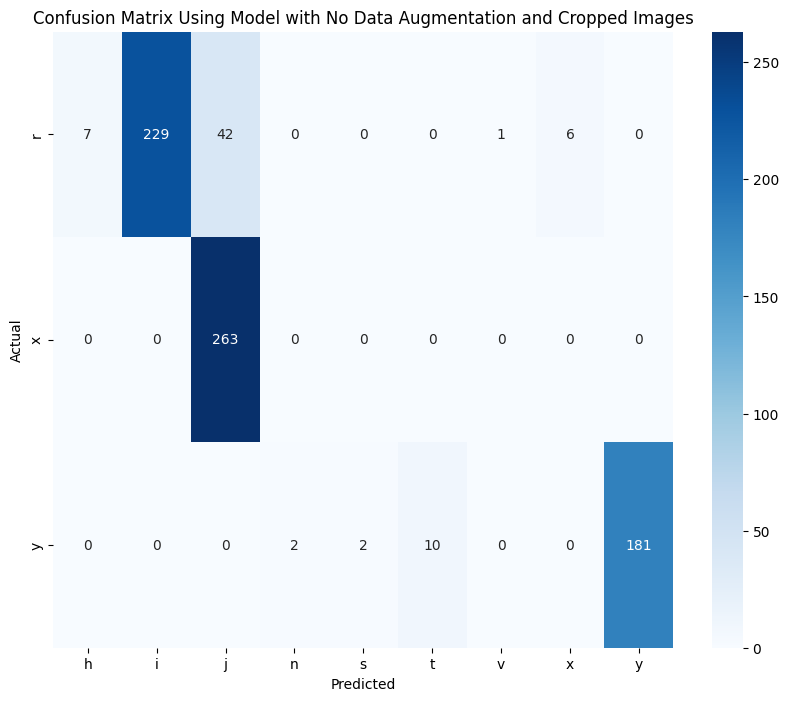

In [17]:
confusion_matrix = pd.crosstab(cropped_df['label'], cropped_df['no_aug_model_pred'])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using Model with No Data Augmentation and Cropped Images')
plt.show()

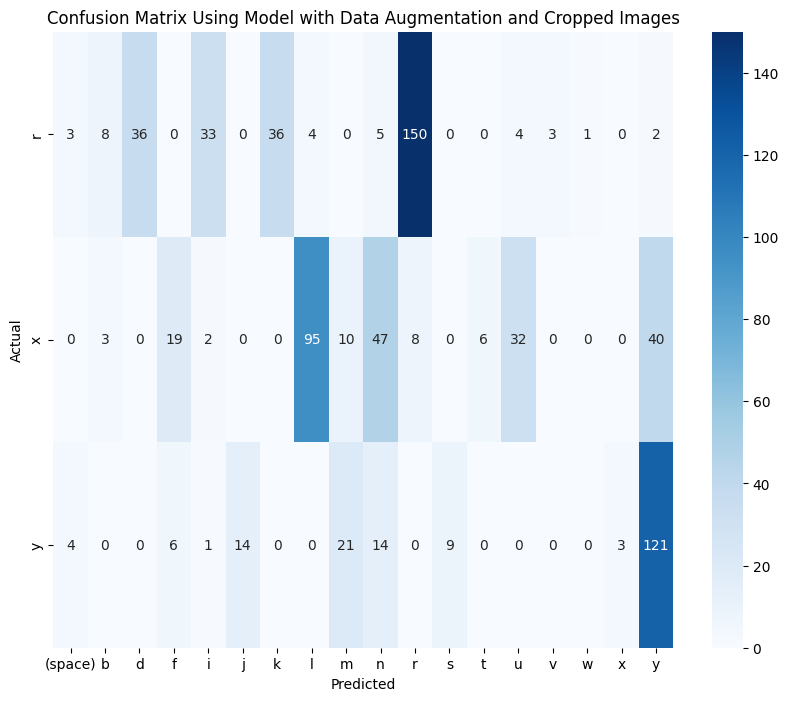

In [18]:
confusion_matrix = pd.crosstab(cropped_df['label'], cropped_df['aug_model_pred'])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using Model with Data Augmentation and Cropped Images')
plt.show()

# **Part Two: Uncropped Images**

# Formatting Data

Loading in the dataset

In [19]:
uncropped_folder = '/kaggle/input/test-images3/dataaa/uncropped'
all_uncropped_data = []
#travel through everything in the training data to get the label and path and add it to all_data
for folder in os.listdir(uncropped_folder):
	label_folder = os.path.join(uncropped_folder, folder)
	onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
	all_uncropped_data += onlyfiles
#create a data frame with all the labels and pathways
uncropped_df = pd.DataFrame(all_uncropped_data)

Performing steps to make the image paths into images that predictions can be made on

In [20]:
uncropped_df['image']=uncropped_df['path'].apply(lambda x: keras.utils.load_img(x, target_size = (64,64))) #get the actual images from the file paths and make them correct size
uncropped_df

,label,path,image
0,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...
1,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...
2,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...
3,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...
4,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...
...,...,...,...
753,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...
754,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...
755,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...
756,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...


In [21]:
uncropped_df['input_data'] = uncropped_df['image'].apply(lambda x: keras.utils.img_to_array(x)) #turn the images into an array which can be fed to the model
uncropped_df

,label,path,image,input_data
0,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[92.0, 86.0, 51.0], [145.0, 133.0, 92.0], [8..."
1,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[88.0, 80.0, 41.0], [143.0, 129.0, 91.0], [8..."
2,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[88.0, 78.0, 64.0], [142.0, 128.0, 104.0], [..."
3,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[135.0, 124.0, 95.0], [128.0, 114.0, 94.0], ..."
4,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[89.0, 80.0, 59.0], [143.0, 130.0, 96.0], [8..."
...,...,...,...,...
753,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[189.0, 187.0, 185.0], [193.0, 193.0, 193.0]..."
754,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[198.0, 198.0, 196.0], [203.0, 205.0, 204.0]..."
755,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[185.0, 185.0, 184.0], [188.0, 192.0, 191.0]..."
756,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[199.0, 196.0, 197.0], [203.0, 205.0, 209.0]..."


In [22]:
uncropped_df['input_data'] = uncropped_df['input_data'].apply(lambda x: np.expand_dims(x, axis=0)) #make them ready to predict on
uncropped_df

,label,path,image,input_data
0,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[92. 86. 51.], [145. 133. 92.], [83. 75. 4..."
1,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[88. 80. 41.], [143. 129. 91.], [85. 69. 4..."
2,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[88. 78. 64.], [142. 128. 104.], [84. 72. 5..."
3,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[135. 124. 95.], [128. 114. 94.], [68. 50..."
4,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[89. 80. 59.], [143. 130. 96.], [80. 69. 4..."
...,...,...,...,...
753,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[189. 187. 185.], [193. 193. 193.], [188. 1..."
754,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[198. 198. 196.], [203. 205. 204.], [202. 2..."
755,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[185. 185. 184.], [188. 192. 191.], [187. 1..."
756,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[199. 196. 197.], [203. 205. 209.], [199. 2..."


# Using Model trained without Data augmentation

In [23]:
uncropped_df['no_aug_model_pred'] = uncropped_df['input_data'].apply(lambda x: no_aug_model.predict(x)) #make predictions for all the images with the no_aug_model
uncropped_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

,label,path,image,input_data,no_aug_model_pred
0,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[92. 86. 51.], [145. 133. 92.], [83. 75. 4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[88. 80. 41.], [143. 129. 91.], [85. 69. 4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[88. 78. 64.], [142. 128. 104.], [84. 72. 5...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[135. 124. 95.], [128. 114. 94.], [68. 50...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[89. 80. 59.], [143. 130. 96.], [80. 69. 4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...
753,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[189. 187. 185.], [193. 193. 193.], [188. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
754,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[198. 198. 196.], [203. 205. 204.], [202. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
755,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[185. 185. 184.], [188. 192. 191.], [187. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
756,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[199. 196. 197.], [203. 205. 209.], [199. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Using Model trained with Data augmentation

In [24]:
uncropped_df['aug_model_pred'] = uncropped_df['input_data'].apply(lambda x: aug_model.predict(x)) #make predictions for all the images with the aug_model
uncropped_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

,label,path,image,input_data,no_aug_model_pred,aug_model_pred
0,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[92. 86. 51.], [145. 133. 92.], [83. 75. 4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[88. 80. 41.], [143. 129. 91.], [85. 69. 4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[88. 78. 64.], [142. 128. 104.], [84. 72. 5...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[135. 124. 95.], [128. 114. 94.], [68. 50...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,r,/kaggle/input/test-images3/dataaa/uncropped/r/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[89. 80. 59.], [143. 130. 96.], [80. 69. 4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...
753,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[189. 187. 185.], [193. 193. 193.], [188. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
754,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[198. 198. 196.], [203. 205. 204.], [202. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
755,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[185. 185. 184.], [188. 192. 191.], [187. 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
756,y,/kaggle/input/test-images3/dataaa/uncropped/y/...,<PIL.Image.Image image mode=RGB size=64x64 at ...,"[[[[199. 196. 197.], [203. 205. 209.], [199. 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [25]:
uncropped_df['aug_model_pred'] = uncropped_df['aug_model_pred'].apply(lambda x: np.argmax(x, axis = 1))
uncropped_df['aug_model_pred'] = uncropped_df['aug_model_pred'].apply(lambda x: idx_to_letter(x)) 

uncropped_df['no_aug_model_pred'] = uncropped_df['no_aug_model_pred'].apply(lambda x: np.argmax(x, axis = 1))
uncropped_df['no_aug_model_pred'] = uncropped_df['no_aug_model_pred'].apply(lambda x: idx_to_letter(x)) 

# Analysis

In [26]:
no_aug_correct_num = (uncropped_df['label'] == uncropped_df['no_aug_model_pred']).sum()

no_aug_correct_percentage = (no_aug_correct_num / len(uncropped_df)) * 100

print(f"The percentage of rows where prediction matched label with no data augmentation: {no_aug_correct_percentage:.2f}%")

The percentage of rows where prediction matched label with no data augmentation: 8.05%


In [27]:
aug_correct_num = (uncropped_df['label'] == uncropped_df['aug_model_pred']).sum()

aug_correct_percentage = (aug_correct_num / len(cropped_df)) * 100

print(f"The percentage of rows where prediction matched label with data augmentation: {aug_correct_percentage:.2f}%")

The percentage of rows where prediction matched label with data augmentation: 0.00%


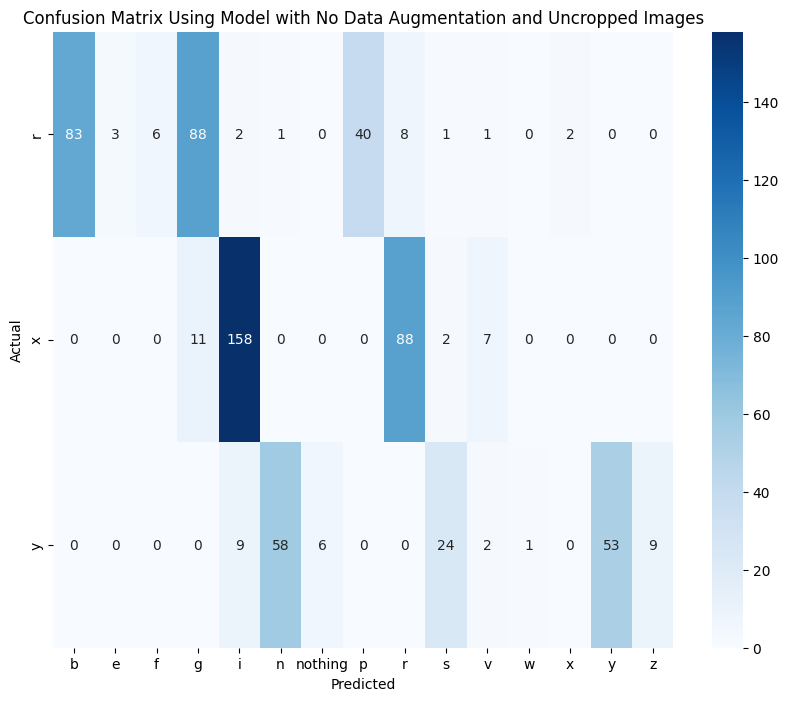

In [28]:
confusion_matrix = pd.crosstab(uncropped_df['label'], uncropped_df['no_aug_model_pred'])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using Model with No Data Augmentation and Uncropped Images')
plt.show()

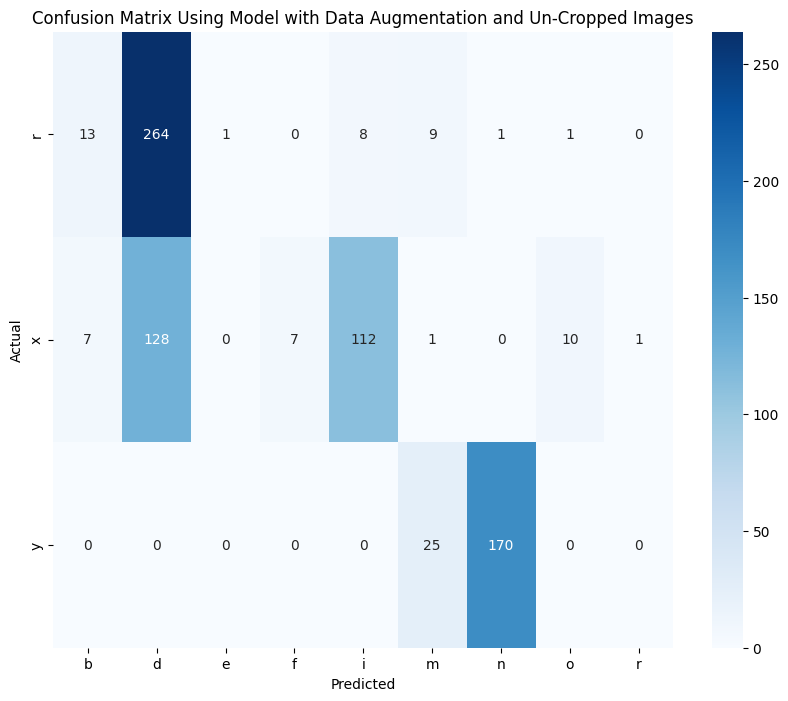

In [29]:
confusion_matrix = pd.crosstab(uncropped_df['label'], uncropped_df['aug_model_pred'])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Using Model with Data Augmentation and Un-Cropped Images')
plt.show()